In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('SharedResponsesSurvey.csv')

/home/taran/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,8,9,10,11,12,17,20,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
data.

SyntaxError: invalid syntax (<ipython-input-42-a4aa780eaf33>, line 1)

In [3]:
data=data.iloc[:, 3:]
data1=data[['UserCountry3']]

In [3]:
data = data[['ScenarioOrder','ScenarioTypeStrict', 'Saved','Review_age', 'Review_gender','UserCountry3']]


In [4]:
data = data.dropna()
data

,ScenarioOrder,ScenarioTypeStrict,Saved,Review_age,Review_gender,UserCountry3
0,13.0,Gender,1.0,32.0,male,RUS
1,8.0,Fitness,0.0,32.0,male,RUS
2,2.0,Age,0.0,32.0,male,RUS
3,1.0,Species,0.0,32.0,male,RUS
4,5.0,Fitness,0.0,32.0,male,RUS
...,...,...,...,...,...,...
149994,11.0,Gender,0.0,39.0,male,DEU
149995,2.0,Random,0.0,39.0,male,DEU
149996,1.0,Species,1.0,32.0,male,TUR
149997,12.0,Gender,0.0,32.0,male,TUR


In [5]:
data = data[(data['ScenarioOrder'] >= 1) & (data['ScenarioOrder'] <= 6)]
scenario_1 = data[(data['ScenarioOrder'] == 1)]
scenario_1.dropna()
scenario_2 = data[(data['ScenarioOrder'] == 2)]
scenario_3 = data[(data['ScenarioOrder'] == 3)]
scenario_4 = data[(data['ScenarioOrder'] == 4)]
scenario_5 = data[(data['ScenarioOrder'] == 5)]
scenario_6 = data[(data['ScenarioOrder'] == 6)]
scenario_1.shape

(10208, 6)

In [6]:
Y = scenario_1['Saved']
X = scenario_1[['ScenarioOrder','ScenarioTypeStrict','UserCountry3','Review_age', 'Review_gender']]
#SKLEARN PRED
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#OHE


#lr = LogisticRegression()
#print("OKAY")
#lr.fit(X_train, y_train)

In [7]:
######ONE HOT ENCODING THE DATA######
scenario_type = pd.get_dummies(scenario_1['ScenarioTypeStrict'])
#scenario_1.drop(['ScenarioTypeStrict'], axis = 1)
scenario_1 = scenario_1.drop('ScenarioTypeStrict', 1)

#scenario_country = pd.get_dummies(scenario_1['UserCountry3'])
#scenario_country.head()
scenario_gender = pd.get_dummies(scenario_1['Review_gender'])
scenario_1 = scenario_1.drop('Review_gender', 1)
#scenario_1.drop(['ScenarioTypeStrict', 'UserCountry3','Review_gender'], axis = 1)

#scenario_1.join(scenario_type)
#scenario_1.join(scenario_country)
#scenario_1.join(scenario_gender)
#scenario_1.head()

In [8]:
scenario_1 = scenario_1.replace([np.inf, -np.inf], np.nan)
scenario_1 = scenario_1.dropna()
max(scenario_1['Review_age'])

1.0000000000000001e+37

In [9]:
scenario_1= pd.concat([scenario_1, scenario_type], axis = 1)
scenario_1 = pd.concat([scenario_1, scenario_gender], axis = 1)
scenario_1.dropna()
#scenario_1 = scenario_1.drop('Review_age', 1)

,ScenarioOrder,Saved,Review_age,UserCountry3,Age,Fitness,Gender,Random,Social Status,Species,Utilitarian,default,female,male,others
3,1.0,0.0,32.0,RUS,0,0,0,0,0,1,0,0,0,1,0
15,1.0,0.0,23.0,BEL,1,0,0,0,0,0,0,0,0,1,0
25,1.0,0.0,15.0,GHA,0,0,0,0,1,0,0,0,0,1,0
38,1.0,0.0,15.0,BRA,0,1,0,0,0,0,0,0,0,1,0
52,1.0,0.0,23.0,USA,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149952,1.0,1.0,15.0,MEX,0,0,0,0,0,0,1,0,0,1,0
149971,1.0,0.0,18.0,USA,0,1,0,0,0,0,0,0,0,1,0
149973,1.0,0.0,26.0,USA,0,0,1,0,0,0,0,0,0,1,0
149992,1.0,1.0,39.0,DEU,0,0,0,0,0,1,0,0,0,1,0


In [161]:
scenario_1
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler=MinMaxScaler()
#X_train=scaler.fit_transform(X_train)
#y_train=np.log(1+y_train)
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

#X_test_sc=scaler.fit_transform(X_test)
#y_test_sc=np.log(1+y_test)
y_test=y_test/max(y_test)
y_train=y_train/max(y_train)

In [22]:
scenario_1 = scenario_1.dropna()
print(scenario_1.isnull().values.any())
Y = scenario_1['Saved']
X = scenario_1[['Review_age','Age','Fitness','Gender','Random','Social Status','Species','Utilitarian','default','female','male','others']]
print(X)
#SKLEARN PRED
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler=MinMaxScaler()
#X_train=scaler.fit_transform(X_train)
#y_train=np.log(1+y_train)
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

#X_test_sc=scaler.fit_transform(X_test)
#y_test_sc=np.log(1+y_test)
y_test=y_test/max(y_test)
y_train=y_train/max(y_train)
lr = LogisticRegression()
print("OKAY")
lr.fit(X_train, y_train)

False
        Review_age  Age  Fitness  Gender  Random  Social Status  Species  \
3             32.0    0        0       0       0              0        1   
15            23.0    1        0       0       0              0        0   
25            15.0    0        0       0       0              1        0   
38            15.0    0        1       0       0              0        0   
52            23.0    0        1       0       0              0        0   
...            ...  ...      ...     ...     ...            ...      ...   
149952        15.0    0        0       0       0              0        0   
149971        18.0    0        1       0       0              0        0   
149973        26.0    0        0       1       0              0        0   
149992        39.0    0        0       0       0              0        1   
149996        32.0    0        0       0       0              0        1   

        Utilitarian  default  female  male  others  
3                 0        0

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
X_test.shape

(2552, 12)

In [33]:
predictions = lr.predict(X_test)

In [34]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy_percentage = 100 * accuracy
accuracy_percentage

54.075235109717866

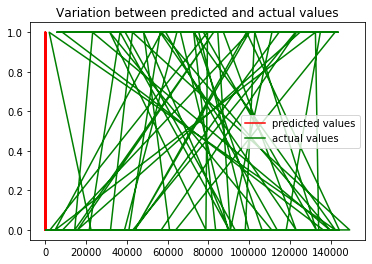

In [35]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(predictions[:100], color='red', label='predicted values')
ax.plot(y_test[:100], color='green', label='actual values')
plt.title('Variation between predicted and actual values')
ax.legend()
plt.show()

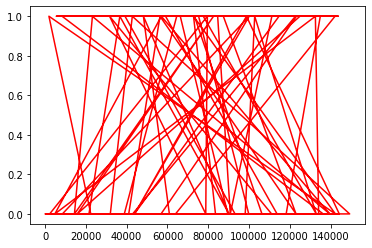

In [37]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(y_test[:100], color='red', label='predicted values')

In [38]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1269  110]
 [1062  111]]


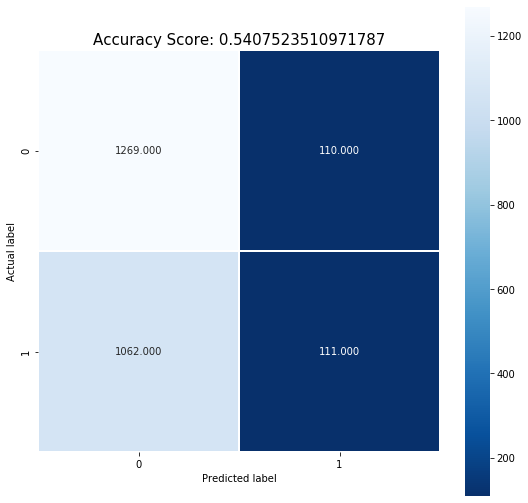

In [40]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [28]:
y_test.shape

(2552,)

In [186]:
scenario_1

,ScenarioOrder,Saved,Review_age,Age,Fitness,Gender,Random,Social Status,Species,Utilitarian,default,female,male,others
3,1.0,0.0,32.0,0,0,0,0,0,1,0,0,0,1,0
15,1.0,0.0,23.0,1,0,0,0,0,0,0,0,0,1,0
25,1.0,0.0,15.0,0,0,0,0,1,0,0,0,0,1,0
38,1.0,0.0,15.0,0,1,0,0,0,0,0,0,0,1,0
52,1.0,0.0,23.0,0,1,0,0,0,0,0,0,0,1,0
58,1.0,1.0,23.0,0,0,1,0,0,0,0,0,0,1,0
79,1.0,0.0,22.0,0,0,0,0,0,1,0,0,0,1,0
82,1.0,1.0,17.0,0,0,1,0,0,0,0,0,1,0,0
97,1.0,0.0,30.0,0,1,0,0,0,0,0,0,0,1,0
139,1.0,0.0,26.0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
#xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.9,learning_rate=0.3, max_depth=16,alpha= 15, n_estimators=19)
xg_classifier = XGBClassifier(objective='binary:logistic')
#xg_classifier.fit(X_train,y_train)

colsample_bytree =  [0.1,0.3,0.5,0.7,0.9] # softmax, softplus, softsign 
max_depth = [5,10,15,20,25,30,40,50]
learning_rate = [ 0.1, 0.01, 0.3, 0.9, 0.6, 1.2,1.8]
n_estimators = [10, 20, 50, 100, 200, 500, 1000]
alpha = [10, 5, 2, 15, 20, 25, 30]
##############################################################
param_grid = dict(colsample_bytree=colsample_bytree, max_depth=max_depth,learning_rate=learning_rate, n_estimators=n_estimators, alpha=alpha)
##############################################################
grid = GridSearchCV(estimator=xg_classifier, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train) 



#preds=xg_classifier.predict(x_test)
#print("Mean squared error: ",mean_squared_error(y_test, preds))
#print("r2 score: ", r2_score(y_test, preds))

c:\users\taran\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
grid_result.best_params_

In [73]:
scenario_1f = scenario_1.dropna()
Y = scenario_1f['Saved']
X = scenario_1f[['ScenarioOrder','Review_age','Age','Fitness','Gender','Random','Social Status','Species','Utilitarian','default','female','male','others']]
#SKLEARN PRED
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
print("OKAY")
lr.fit(x_train, y_train)


OKAY


c:\users\taran\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [7]:
data_india = data[(data['UserCountry3'] == "IND")]

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
#xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.9,learning_rate=0.3, max_depth=16,alpha= 15, n_estimators=19)
xg_classifier = XGBClassifier(objective='binary:logistic')
#xg_classifier.fit(X_train,y_train)

colsample_bytree =  [0.1,0.3,0.5,0.7,0.9] # softmax, softplus, softsign 
max_depth = [5,10,15,20,25,30,40,50]
learning_rate = [ 0.1, 0.01, 0.3, 0.9, 0.6, 1.2,1.8]
n_estimators = [10, 20, 50, 100, 200, 500, 1000]
alpha = [10, 5, 2, 15, 20, 25, 30]
##############################################################
param_grid = dict(colsample_bytree=colsample_bytree, max_depth=max_depth,learning_rate=learning_rate, n_estimators=n_estimators, alpha=alpha)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train) 



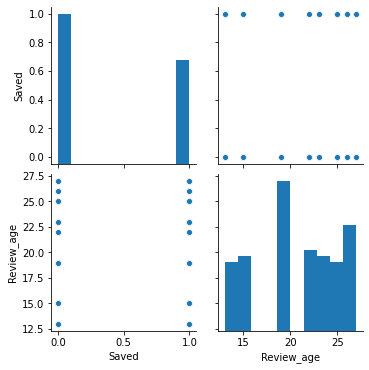

In [68]:
import seaborn as sns
data_india1=data_india.head(100)
sns.pairplot(data_india1[["ScenarioTypeStrict","Saved","Review_gender", "Review_age"]])

In [80]:
###################################################################################################3
#Age scenario
data_india_age = data_india[(data_india['ScenarioTypeStrict'] == "Age")]

In [85]:
data_india_age["Review_age"] = data_india_age["Review_age"].astype(int)
print(data_india_age["Review_age"])

3860      26
3867      26
4091      22
4092      22
5582      19
          ..
142883    18
143636    26
143644    26
146521    25
146527    25
Name: Review_age, Length: 102, dtype: int64


/home/taran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
data_india_age.sort_values(["ScenarioOrder"], axis=0, 
                 ascending=True, inplace=True) 

/home/taran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
data_india_age = data_india_age.dropna()

In [86]:
len(data_india_age)

102

In [73]:
data_india_age_young =  data_india_age[(data_india_age['Saved'] == 0.0)]


In [74]:
data_india_age_old =  data_india_age[(data_india_age['Saved'] == 1.0)]
data_india_age_old.dropna()
len(data_india_age_old)

48

In [90]:
len(data_india_age_old)
average_age_saving_old = data_india_age_old["Review_age"].sum()/len(data_india_age_old)

In [94]:
len(data_india_age_young)
average_age_saving_young = data_india_age_young["Review_age"].sum()/len(data_india_age_young)

1.851851851851852e+39

In [87]:
average_age_saving_old

23.791666666666668

In [91]:
average_age_saving_young

1.851851851851852e+39

In [93]:
data_india_age_young["Review_age"].sum()

1e+41

In [40]:
males_young = data_india_age_young[(data_india_age_young['Review_gender'] == "male")]
females_young = data_india_age_young[(data_india_age_young['Review_gender'] == "female")]
males_old = data_india_age_old[(data_india_age_old['Review_gender'] == "male")]
females_old = data_india_age_old[(data_india_age_old['Review_gender'] == "female")]


In [45]:
x=(len(males_young)/len(data_india_age))*100

In [46]:
y=(len(males_old)/len(data_india_age))*100

In [47]:
z=(len(females_old)/len(data_india_age))*100

In [48]:
t=(len(females_young)/len(data_india_age))*100

In [49]:
import matplotlib.pyplot as plt

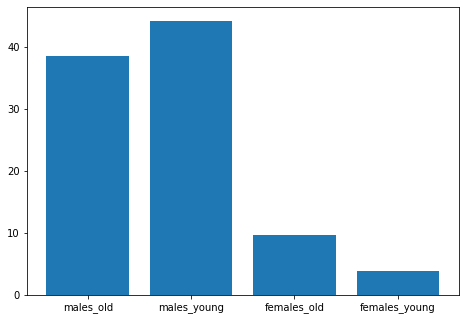

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
preferences = ['males_old', 'males_young', 'females_old', 'females_young']
average = [y,x,z,t]
ax.bar(preferences,average)
plt.show()

In [52]:
y/x*100

86.95652173913045

In [54]:
t/z*100

40.0

In [8]:
#################################################################################################33
#Gender scenarios
data_india_gender = data_india[(data_india['ScenarioTypeStrict'] == "Gender")]

In [9]:
data_india_gender.sort_values(["ScenarioOrder"], axis=0, 
                 ascending=True, inplace=True) 

/home/taran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data_india_gender_female =  data_india_gender[(data_india_gender['Saved'] == 1.0)]
data_india_gender_male =  data_india_gender[(data_india_gender['Saved'] == 0.0)]
average_age_choosing_male = data_india_gender_male["Review_age"].sum()/len(data_india_gender_male)
average_age_choosing_female = data_india_gender_female["Review_age"].sum()/len(data_india_gender_female)


In [11]:
males_males = data_india_gender_male[(data_india_gender_male['Review_gender'] == "male")]
females_males = data_india_gender_male[(data_india_gender_male['Review_gender'] == "female")]
males_females = data_india_gender_female[(data_india_gender_female['Review_gender'] == "male")]
females_females = data_india_gender_female[(data_india_gender_female['Review_gender'] == "female")]

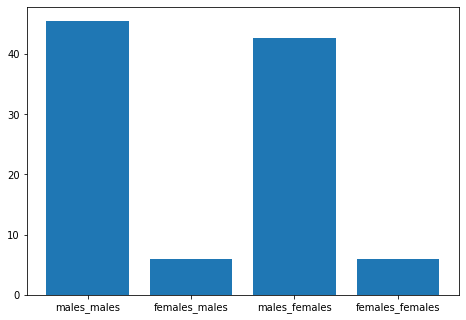

In [13]:
import matplotlib.pyplot as plt
x1=(len(males_males)/len(data_india_gender))*100
x2=(len(females_males)/len(data_india_gender))*100
x3=(len(males_females)/len(data_india_gender))*100
x4=(len(females_females)/len(data_india_gender))*100
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
preferences = ['males_males', 'females_males', 'males_females', 'females_females']
average = [x1,x2,x3,x4]
ax.bar(preferences,average)
plt.show()

In [60]:
########Correlation Plot########
# Correlation plots between countries
import seaborn as sns
data_usa = data[(data['UserCountry3'] == "USA")]
data_france = data[(data['UserCountry3'] == "FRA")]
data_russia = data[(data['UserCountry3'] == "RUS")]
data_japan = data[(data['UserCountry3'] == "IND")]

In [47]:
data_usa_age = data_usa[(data_usa['ScenarioTypeStrict'] == "Age")]
data_france_age = data_france[(data_france['ScenarioTypeStrict'] == "Age")]
data_russia_age = data_russia[(data_russia['ScenarioTypeStrict'] == "Age")]
data_japan_age = data_japan[(data_japan['ScenarioTypeStrict'] == "Age")]

In [50]:
a = min(len(data_usa_age), len(data_france_age), len(data_russia_age), len(data_japan_age))
a


102

In [51]:
data_usa_age = data_usa_age.sample(n = 102)
data_france_age = data_france_age.sample(n = 102)
data_russia_age = data_russia_age.sample(n = 102)
data_japan_age = data_japan_age.sample(n = 102)

In [52]:
data_usa_age

,ScenarioOrder,ScenarioTypeStrict,Saved,Review_age,Review_gender,UserCountry3
129421,9.0,Age,0.0,41.0,male,USA
110134,10.0,Age,0.0,25.0,male,USA
24917,7.0,Age,1.0,26.0,female,USA
95651,6.0,Age,1.0,48.0,female,USA
43414,5.0,Age,1.0,22.0,male,USA
...,...,...,...,...,...,...
28949,12.0,Age,0.0,16.0,female,USA
95946,1.0,Age,0.0,34.0,male,USA
44089,1.0,Age,0.0,31.0,male,USA
55450,5.0,Age,1.0,15.0,female,USA


In [54]:
#################Correlation plot age#############
####using count of young

usa = len(data_usa_age[(data_usa_age['Saved'] == 0)])/len(data_usa_age)
fra = len(data_france_age[(data_france_age['Saved'] == 0)])/len(data_france_age)
rus = len(data_russia_age[(data_russia_age['Saved'] == 0)])/len(data_russia_age)
jpn = len(data_japan_age[(data_japan_age['Saved'] == 0)])/len(data_japan_age)

In [55]:
uvf = abs(usa-fra)
uvr = abs(usa-rus)
uvj = abs(usa-jpn)
rvu = abs(rus-usa)
rvf = abs(rus-fra)
rvj = abs(rus-jpn)
fvu = abs(fra-usa)
fvr = abs(fra-rus)
fvj = abs(fra-jpn)
jvf = abs(jpn-fra)
jvr = abs(jpn-rus)
jvu = abs(jpn-usa)

In [17]:
"""
uvf = usa/(usa+fra)
uvr = usa/(usa+rus)
uvj = usa/(usa+jpn)
rvu = rus/(usa+rus)
rvf = rus/(rus+rus)
rvj = rus/(rus+jpn)
fvu = fra/(usa+fra)
fvr = fra/(fra+rus)
fvj = fra/(fra+jpn)
jvf = jpn/(jpn+fra)
jvr = jpn/(jpn+rus)
jvu = jpn/(usa+jpn)
"""

'\nuvf = usa/(usa+fra)\nuvr = usa/(usa+rus)\nuvj = usa/(usa+jpn)\nrvu = rus/(usa+rus)\nrvf = rus/(rus+rus)\nrvj = rus/(rus+jpn)\nfvu = fra/(usa+fra)\nfvr = fra/(fra+rus)\nfvj = fra/(fra+jpn)\njvf = jpn/(jpn+fra)\njvr = jpn/(jpn+rus)\njvu = jpn/(usa+jpn)\n'

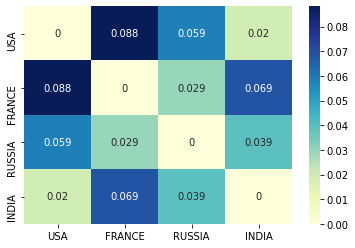

In [56]:
import plotly.express as px
import plotly.figure_factory as ff

data=[[0, uvf, uvr, uvj], [fvu, 0, fvr, fvj], [rvu, rvf, 0, rvj], [jvu, jvf, jvr, 0]]
x=['USA', 'FRANCE', 'RUSSIA', 'INDIA']
y=['USA', 'FRANCE', 'RUSSIA', 'INDIA']

ax = sns.heatmap(data, annot=True, xticklabels=x, yticklabels=y, cmap="YlGnBu")


#ig = ff.create_annotated_heatmap(data,x=x,y=y)

#ig.show()


In [61]:
##############GENDER
data_usa_gender = data_usa[(data_usa['ScenarioTypeStrict'] == "Gender")]
data_france_gender = data_france[(data_france['ScenarioTypeStrict'] == "Gender")]
data_russia_gender = data_russia[(data_russia['ScenarioTypeStrict'] == "Gender")]
data_japan_gender = data_japan[(data_japan['ScenarioTypeStrict'] == "Gender")]

In [62]:
usa = len(data_usa_gender[(data_usa_gender['Saved'] == 0)])/len(data_usa_gender)
fra = len(data_france_gender[(data_france_gender['Saved'] == 0)])/len(data_france_gender)
rus = len(data_russia_gender[(data_russia_gender['Saved'] == 0)])/len(data_russia_gender)
jpn = len(data_japan_gender[(data_japan_gender['Saved'] == 0)])/len(data_japan_gender)

In [63]:
"""
uvf = usa/(usa+fra)
uvr = usa/(usa+rus)
uvj = usa/(usa+jpn)
rvu = rus/(usa+rus)
rvf = rus/(rus+rus)
rvj = rus/(rus+jpn)
fvu = fra/(usa+fra)
fvr = fra/(fra+rus)
fvj = fra/(fra+jpn)
jvf = jpn/(jpn+fra)
jvr = jpn/(jpn+rus)
jvu = jpn/(usa+jpn)
"""

'\nuvf = usa/(usa+fra)\nuvr = usa/(usa+rus)\nuvj = usa/(usa+jpn)\nrvu = rus/(usa+rus)\nrvf = rus/(rus+rus)\nrvj = rus/(rus+jpn)\nfvu = fra/(usa+fra)\nfvr = fra/(fra+rus)\nfvj = fra/(fra+jpn)\njvf = jpn/(jpn+fra)\njvr = jpn/(jpn+rus)\njvu = jpn/(usa+jpn)\n'

In [64]:
uvf = abs(usa-fra)
uvr = abs(usa-rus)
uvj = abs(usa-jpn)
rvu = abs(rus-usa)
rvf = abs(rus-fra)
rvj = abs(rus-jpn)
fvu = abs(fra-usa)
fvr = abs(fra-rus)
fvj = abs(fra-jpn)
jvf = abs(jpn-fra)
jvr = abs(jpn-rus)
jvu = abs(jpn-usa)

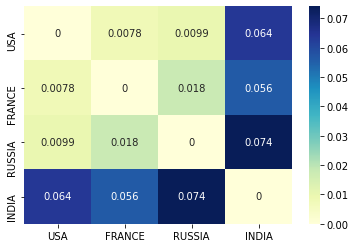

In [66]:
import plotly.express as px
import plotly.figure_factory as ff

data=[[0, uvf, uvr, uvj], [fvu, 0, fvr, fvj], [rvu, rvf, 0, rvj], [jvu, jvf, jvr, 0]]
x=['USA', 'FRANCE', 'RUSSIA', 'INDIA']
y=['USA', 'FRANCE', 'RUSSIA', 'INDIA']

ax = sns.heatmap(data, annot=True, xticklabels=x, yticklabels=y, cmap="YlGnBu")
